**recsys-cluster-loss**

Example of cluster analysis in the context of recommendation systems.
Users who receive recommendations will be grouped based on the individual fairness measure of those recommendations.
The objective is to analyze whether there is any type of injustice of non-obvious user groups, that is, groups that cannot be configured based on some explicit user characteristic (variable) (for example: gender, age, etc.) .

Two methods of grouping will be applied:
1. Hierarchical clustering (tree clustering - dendrogram)
2. Non-hierarchical grouping by breakdown (grouping by k-Means)

In this file we are analyzing the possible groupings considering the following variable(s):
- Loss: individual unfairness

Recommendation system: generating the recommendation matrix and calculating individual fairness

In [1]:
# cloning repository with database
!rm -rf recsys-cluster-loss
!git clone https://github.com/ravarmes/recsys-cluster-loss.git

Cloning into 'recsys-cluster-loss'...


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster import hierarchy

import warnings
warnings.filterwarnings('ignore')

sns.set()

In [3]:
import sys
sys.path.append('recsys-cluster-loss/src')
from RecSys import RecSys
from UserFairness import IndividualLossVariance
from UserFairness import GroupLossVariance

In [4]:
# reading data from a base with 20 movies and 40 users
Data_path = 'recsys-cluster-loss/data/MovieLens-Small'
n_users=  40
n_items= 20
top_users = False # True: to use users with more ratings; False: otherwise
top_items = False # True: to use movies with more ratings; False: otherwise

In [5]:
# recommendation algorithm
algorithm = 'RecSysExampleAntidoteData20Items'

In [6]:
# parameters for calculating fairness measures
l = 5
theta = 3
k = 3

In [7]:
recsys = RecSys(n_users, n_items, top_users, top_items, l, theta, k)

In [8]:
X, users_info, items_info = recsys.read_movielens_small(n_users, n_items, top_users, top_items, Data_path) # returns matrix of ratings with n_users rows and n_moveis columns
omega = ~X.isnull() # matrix X with True in cells with evaluations and False in cells not rated

In [9]:
users_info

,Gender,Age,NR,SPI,MA,MR
1,1,20,12,530,2.08,2.38
2,2,24,12,570,3.00,2.75
3,1,30,11,600,3.18,2.89
4,2,17,10,550,2.50,2.90
5,1,51,10,500,3.60,3.20
6,2,47,10,550,2.70,3.30
7,1,41,10,500,2.50,2.70
8,2,38,10,550,3.30,2.60
9,1,21,10,500,3.40,3.20
10,2,18,10,550,3.00,2.80


In [10]:
X_est = recsys.compute_X_est(X, algorithm, Data_path) # RecSysALS or RecSysKNN or RecSysNMF or RecSysExampleAntidoteData20Items

In [11]:
ilv = IndividualLossVariance(X, omega, 1)
losses = ilv.get_losses(X_est)

In [12]:
losses

UserID
1     1.000000
2     0.666667
3     4.181818
4     1.600000
5     3.900000
6     1.200000
7     1.800000
8     3.300000
9     3.400000
10    2.600000
11    4.300000
12    7.600000
13    2.400000
14    6.200000
15    4.400000
16    5.300000
17    4.200000
18    2.200000
19    4.400000
20    5.400000
21    4.900000
22    3.800000
23    5.300000
24    6.500000
25    6.200000
26    3.500000
27    1.600000
28    6.000000
29    5.700000
30    2.200000
31    3.900000
32    2.300000
33    5.600000
34    4.100000
35    3.300000
36    6.900000
37    1.200000
38    1.400000
39    5.100000
40    2.500000
dtype: float64

In [13]:
df = pd.DataFrame(columns=['Gender', 'Age', 'NR', 'SPI', 'MA', 'MR', 'Loss'])
df['Loss'] = losses
df['Gender'] = users_info['Gender']
df['Age'] = users_info['Age']
df['NR'] = users_info['NR']
df['SPI'] = users_info['SPI']
df['MA'] = users_info['MA']
df['MR'] = users_info['MR']

df

,Gender,Age,NR,SPI,MA,MR,Loss
UserID,,,,,,,
1,1,20,12,530,2.08,2.38,1.000000
2,2,24,12,570,3.00,2.75,0.666667
3,1,30,11,600,3.18,2.89,4.181818
4,2,17,10,550,2.50,2.90,1.600000
5,1,51,10,500,3.60,3.20,3.900000
6,2,47,10,550,2.70,3.30,1.200000
7,1,41,10,500,2.50,2.70,1.800000
8,2,38,10,550,3.30,2.60,3.300000
9,1,21,10,500,3.40,3.20,3.400000


In [14]:
df.head()

,Gender,Age,NR,SPI,MA,MR,Loss
UserID,,,,,,,
1,1,20,12,530,2.08,2.38,1.000000
2,2,24,12,570,3.00,2.75,0.666667
3,1,30,11,600,3.18,2.89,4.181818
4,2,17,10,550,2.50,2.90,1.600000
5,1,51,10,500,3.60,3.20,3.900000


In [15]:
# number of rows and columns:
df.shape

(40, 7)

In [16]:
# descriptive statistics:
df.describe()

,Gender,Age,NR,SPI,MA,MR,Loss
count,40.00000,40.000000,40.000000,40.000000,40.00000,40.000000,40.000000
mean,1.50000,34.600000,10.125000,528.750000,3.01650,2.963000,3.801212
std,0.50637,14.416515,0.463404,27.844578,0.42208,0.480231,1.823799
min,1.00000,13.000000,10.000000,500.000000,2.08000,2.000000,0.666667
25%,1.00000,22.000000,10.000000,500.000000,2.70000,2.600000,2.275000
50%,1.50000,31.500000,10.000000,550.000000,3.00000,2.950000,3.900000
75%,2.00000,43.250000,10.000000,550.000000,3.30000,3.300000,5.300000
max,2.00000,69.000000,12.000000,600.000000,3.90000,4.000000,7.600000


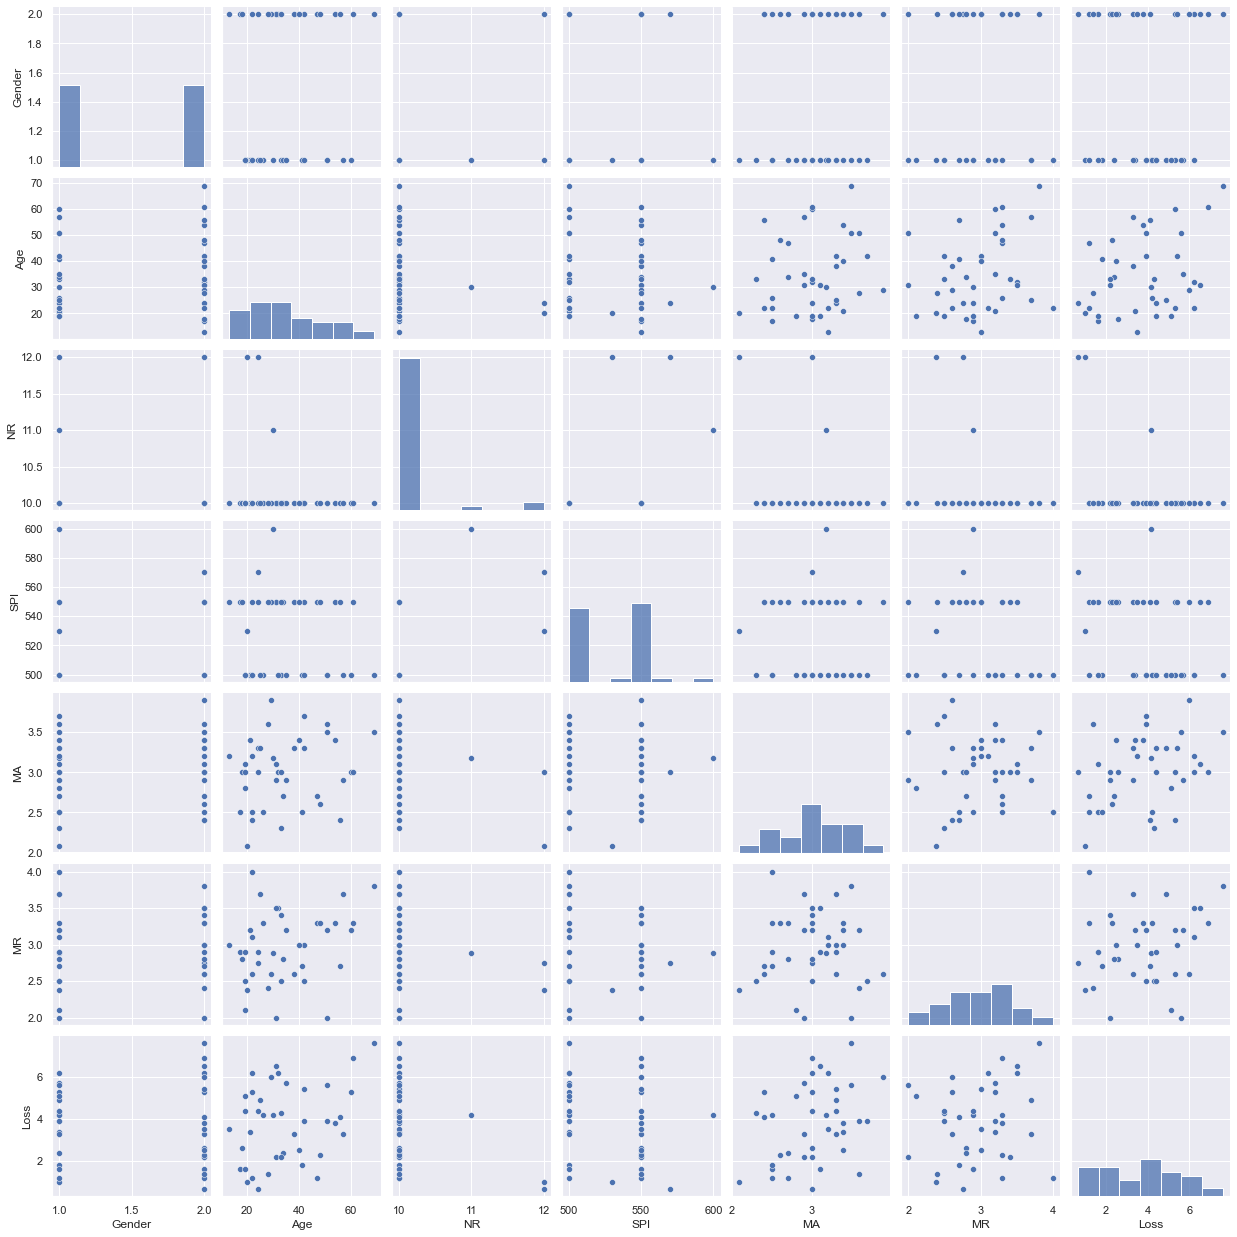

In [17]:
sns.pairplot(df)

<AxesSubplot:>

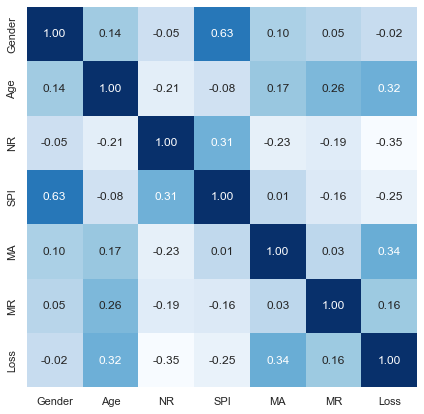

In [18]:
plt.figure(figsize=(7, 7))
corr = np.corrcoef(df.values, rowvar=False)
sns.heatmap(corr, annot=True, cmap='Blues', fmt='.2f', cbar=False, xticklabels=df.columns, yticklabels=df.columns)

Hierarchical clustering (tree clustering - dendrogram)

In [19]:
# Leaving only the Age, NA, SPI, MA, MR and Loss columns to perform cluster analysis
#df = df.drop('Loss', 1) 
df = df.drop('Age', 1) 
df = df.drop('NR', 1) 
df = df.drop('SPI', 1) 
df = df.drop('MA', 1) 
df = df.drop('MR', 1) 

In [20]:
df_scaled = df.copy()
df_scaled.iloc[:, :] = StandardScaler().fit_transform(df)

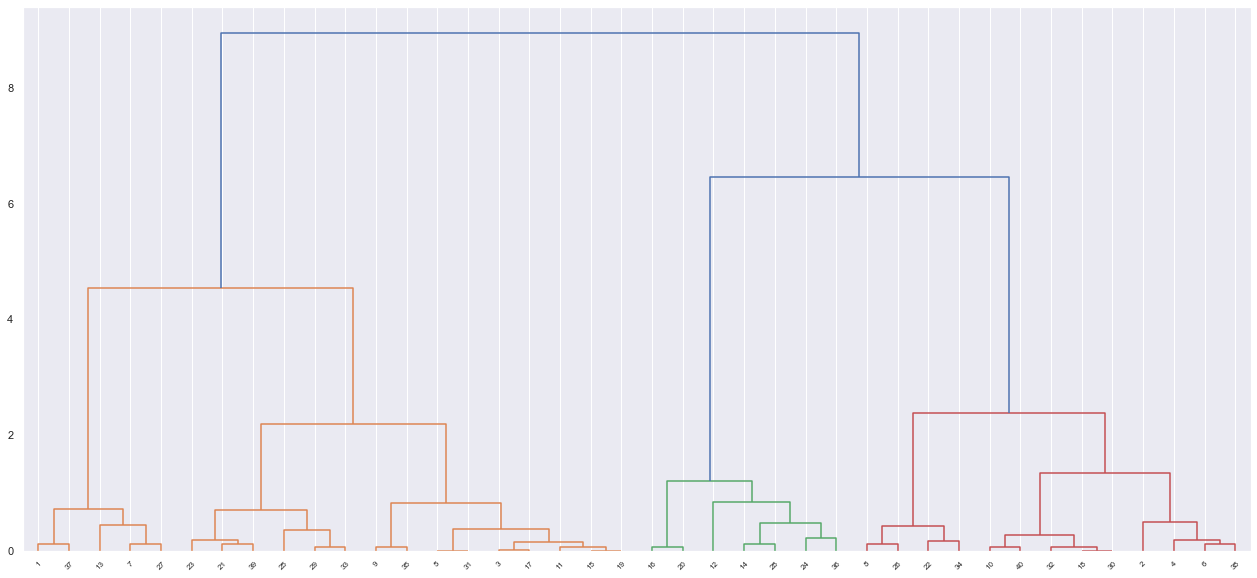

In [21]:
Z = hierarchy.linkage(df_scaled, 'ward') #complete or ward
plt.figure(figsize=(22, 10))
plt.grid(axis='y')
dn = hierarchy.dendrogram(Z, labels=list(df.index), leaf_font_size=8)

In [22]:
n_clusters = 3
cluster = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')
df_scaled['cluster_agglomerative'] = cluster.fit_predict(df_scaled)

In [23]:
# descriptive statistics of groups
df_groups = df.copy()
df_groups["cluster_agglomerative"] = cluster.labels_
df_groups = df_groups.groupby("cluster_agglomerative")
df_groups.describe()

Gender                                     Loss  \
                       count mean  std  min  25%  50%  75%  max count   
cluster_agglomerative                                                   
0                       20.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  20.0   
1                       13.0  2.0  0.0  2.0  2.0  2.0  2.0  2.0  13.0   
2                        7.0  2.0  0.0  2.0  2.0  2.0  2.0  2.0   7.0   

                                                                            \
                           mean       std       min    25%       50%   75%   
cluster_agglomerative                                                        
0                      3.839091  1.536147  1.000000  3.075  4.190909  4.95   
1                      2.412821  1.044522  0.666667  1.600  2.300000  3.30   
2                      6.271429  0.815913  5.300000  5.700  6.200000  6.70   

                            
                       max  
cluster_agglomerative       
0                      6.2  
1                      4.1  
2                      7.6

In [24]:

users = list(df_scaled.index)
groups = df_scaled['cluster_agglomerative']

grouped_users = {i: [] for i in range(n_clusters)}
for user, group in zip(users, groups):
    grouped_users[group].append(user)

for gp, ctr in grouped_users.items():
    print(f'Cluster {gp}: {ctr}\n')

Cluster 0: [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39]

Cluster 1: [2, 4, 6, 8, 10, 18, 22, 26, 30, 32, 34, 38, 40]

Cluster 2: [12, 14, 16, 20, 24, 28, 36]



Non-hierarchical grouping (K-means)

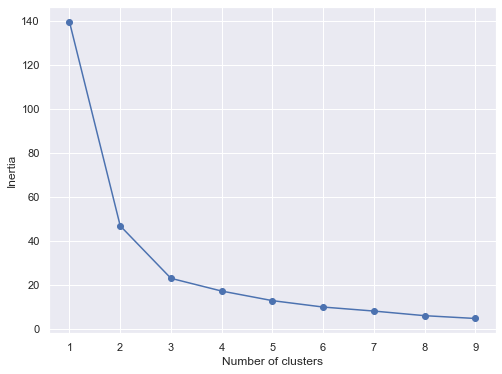

In [25]:
inertias = []
for k in np.arange(1, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df)
    inertias.append(kmeans.inertia_)

# plotting the elbow method graph
plt.figure(figsize=(8, 6))
plt.plot(np.arange(1, 10), inertias, '-o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia');

In [26]:
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters)
df_scaled['cluster_kmeans'] = kmeans.fit_predict(df_scaled)

In [27]:
df_scaled

,Gender,Loss,cluster_agglomerative,cluster_kmeans
UserID,,,,
1,-1.0,-1.555488,0,0
2,1.0,-1.740585,1,1
3,-1.0,0.211347,0,0
4,1.0,-1.222313,1,1
5,-1.0,0.054856,0,0
6,1.0,-1.444430,1,1
7,-1.0,-1.111255,0,0
8,1.0,-0.278319,1,1
9,-1.0,-0.222789,0,0


In [28]:
users = list(df_scaled.index)
groups = df_scaled['cluster_agglomerative']

grouped_users = {i: [] for i in range(n_clusters)}

for user, group in zip(users, groups):
    grouped_users[group].append(user)

for gp, ctr in grouped_users.items():
    print(f'Cluster {gp}: {ctr}\n')

Cluster 0: [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39]

Cluster 1: [2, 4, 6, 8, 10, 18, 22, 26, 30, 32, 34, 38, 40]

Cluster 2: [12, 14, 16, 20, 24, 28, 36]



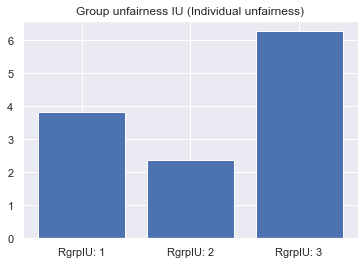

In [29]:
# G group: identifying the groups (IU: individual unfairness - the variance of the user losses)
# The configuration of groups was based in the hierarchical clustering (tree clustering - dendrogram)
# Clusters 1, 2 and 3
G = {1: [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39], 2: [2, 4, 6, 8, 10, 18, 22, 26, 30, 32, 34, 38, 40], 3: [12, 14, 16, 20, 24, 28, 36]}

glv = GroupLossVariance(X, omega, G, 1) #axis = 1 (0 rows e 1 columns)
losses_RgrpIU = glv.get_losses(X_est)

RgrpIU_groups = ['RgrpIU: 1', 'RgrpIU: 2', 'RgrpIU: 3']
plt.bar(RgrpIU_groups, losses_RgrpIU)
plt.title('Group unfairness IU (Individual unfairness)')
plt.show()